In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [3]:
aisles = pd.read_csv("instacart-market-basket-analysis/aisles.csv/aisles.csv")
departments = pd.read_csv("instacart-market-basket-analysis/departments.csv/departments.csv")
order_products__prior = pd.read_csv("instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv")
order_products__train = pd.read_csv("instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv")
orders = pd.read_csv("instacart-market-basket-analysis/orders.csv/orders.csv")
products = pd.read_csv("instacart-market-basket-analysis/products.csv/products.csv")

## Understanding Data

### How does data Look for a user?

<p><span>➤</span> We take a user and see how the data looks for him.</p>
<p><span>➤</span> As we can see from the below table where we have taken data for user_id 1, we can see his different orders(order_number), order day of week(order_dow), at what hour he ordered the order(order_hour_of_day) and days before he ordered his last order(days_since_prior_order) </p>

In [12]:
orders[orders['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


<p><span>➤</span> Now we could also see, what one order contains.</p>
<p><span>➤</span> As we can see for user_id 1 and his order_number 1 which products he has ordered and other information related to that order and product.</p>

In [18]:
order_Prior = orders.merge(order_products__prior, on ='order_id').sort_values(['user_id','order_number'])
order_Prior[(order_Prior['user_id']==1) & (order_Prior['order_number']==1)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


### How many users Train and Test Data

In [19]:

Train_set = orders[orders['eval_set']=='train']
Test_set = orders[orders['eval_set']=='test']
Train_users = Train_set['user_id'].unique()
Test_users = Test_set['user_id'].unique()
print("Train # Users",len(Train_set['user_id'].unique()))
print("Test # Users",len(Test_set['user_id'].unique()))


Train # Users 131209
Test # Users 75000
Percentage of similar user in Train and Test: 0


## Not a Cold Start Problem

In [22]:
Prior_set = orders[orders['eval_set']=='prior']
print("Percentage of Train user in Prior:", (len(np.intersect1d(Train_set['user_id'].unique(),Prior_set['user_id'].unique()))/len(Train_set))*100,"%")
print("Percentage of Test user in Prior:", (len(np.intersect1d(Test_set['user_id'].unique(),Prior_set['user_id'].unique()))/len(Test_set))*100,"%")

Percentage of Train user in Prior: 100.0 %
Percentage of Test user in Prior: 100.0 %


## Checking for NaN values

In [35]:
here=[]
for i in order_products__prior.columns:
    here.append(pd.isna(order_products__prior[i]))
    here.append(order_products__prior[order_products__prior[i] == ''].index)
    here.append(pd.isna(order_products__train[i]))
    here.append(order_products__train[order_products__train[i] == ''].index)
    
for i in orders.columns:
    here.append(pd.isna(orders[i]))
    here.append(orders[orders[i] == ''].index)

for i in here:
    if any(i)==True:
        k=True
    else:
        k=False
if not k:
    print('No None or Empty value')

No None or Empty value


# EDA

## Most ordered products
<p>From this we can get fruits are ordered the most and then the vegetables.</p>

49677it [00:30, 1614.44it/s]


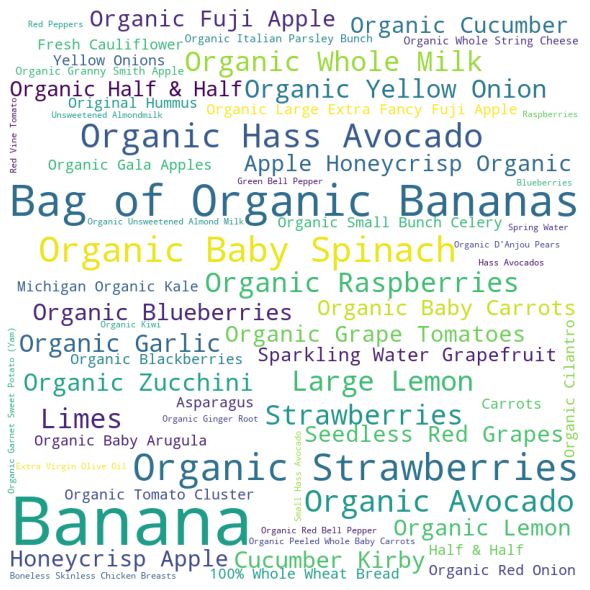

In [7]:
top_prducts = prior_order_merged['product_id'].value_counts()
product = {}
for i,j in tqdm(zip(top_prducts.index,top_prducts.values)):
    product[products[products['product_id']==i]['product_name'].values[0]] = j
    
wordcloud = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 10).generate_from_frequencies(product) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

## What day of the week people order
<p> Mostly the Products are ordered on Sunday and Monday</p>

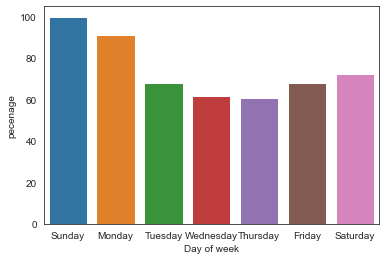

In [83]:
week_frequecy = prior_order_merged[['order_dow','order_id']].groupby(['order_dow']).agg(['count'])
maxval = np.amax(week_frequecy['order_id']['count'].values)
y = list(map(lambda x: (x/maxval)*100,week_frequecy['order_id']['count'].values))
x=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
sns.set_style('white')
sns.barplot(x,y)
plt.xlabel('Day of week')
plt.ylabel('pecenage')
plt.show()

# What Time people order
<p> People mostly order from 9:00 AM to 04:00 PM</p>

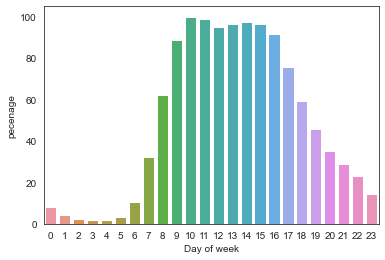

In [13]:
hour_frequecy = prior_order_merged[['order_hour_of_day','order_id']].groupby(['order_hour_of_day']).agg(['count'])
maxval = np.amax(hour_frequecy['order_id']['count'].values)
y = list(map(lambda x: (x/maxval)*100,hour_frequecy['order_id']['count'].values))
x=[*range(0,24)]
sns.set_style('white')
sns.barplot(x,y)
plt.xlabel('Time')
plt.ylabel('pecenage')
plt.show()

## Is Type of food Ordered in evening is different from Morning?

In [61]:
prior_order_merged = orders.merge(order_products__prior,on='order_id')
morningFood = prior_order_merged[prior_order_merged['order_hour_of_day']<=12]['product_id'].value_counts()
eveningFood = prior_order_merged[prior_order_merged['order_hour_of_day']>12]['product_id'].value_counts()


In [64]:
morningFoodNames = list(map(lambda x: products[products['product_id']==x]['product_name'].values[0],morningFood.index[:500]))
eveningFoodNames = list(map(lambda x: products[products['product_id']==x]['product_name'].values[0],eveningFood.index[:500]))

# After how many days people order again

<AxesSubplot:xlabel='days_since_prior_order', ylabel='counts'>

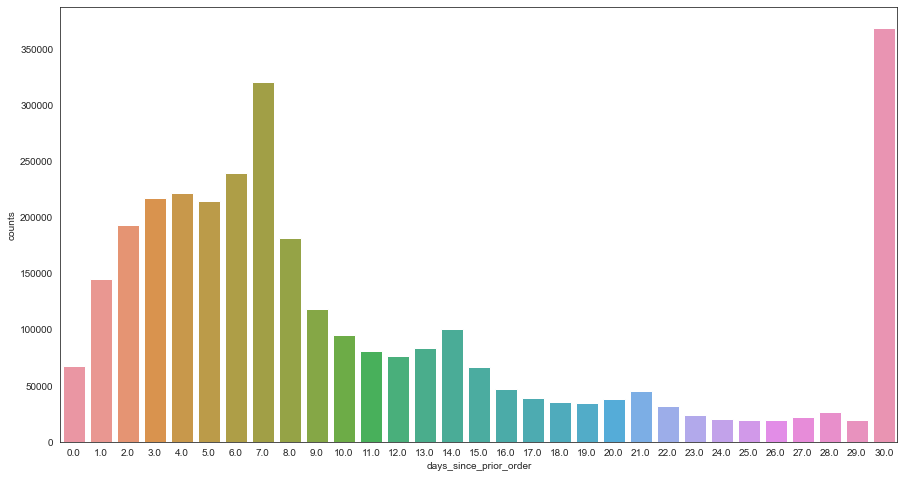

In [25]:
ok = orders.groupby(['days_since_prior_order']).size().reset_index(name='counts')
plt.figure(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='days_since_prior_order', y='counts', data=ok)

# Foods that are ordered most again

[Text(0, 0, 'Banana'),
 Text(1, 0, 'Bag of Organic Bananas'),
 Text(2, 0, 'Organic Strawberries'),
 Text(3, 0, 'Organic Baby Spinach'),
 Text(4, 0, 'Large Lemon'),
 Text(5, 0, 'Limes'),
 Text(6, 0, 'Organic Hass Avocado'),
 Text(7, 0, 'Strawberries'),
 Text(8, 0, 'Organic Avocado'),
 Text(9, 0, 'Organic Blueberries'),
 Text(10, 0, 'Organic Garlic'),
 Text(11, 0, 'Organic Yellow Onion'),
 Text(12, 0, 'Organic Zucchini'),
 Text(13, 0, 'Organic Raspberries'),
 Text(14, 0, 'Cucumber Kirby'),
 Text(15, 0, 'Yellow Onions'),
 Text(16, 0, 'Organic Grape Tomatoes'),
 Text(17, 0, 'Seedless Red Grapes'),
 Text(18, 0, 'Organic Lemon'),
 Text(19, 0, 'Organic Baby Carrots')]

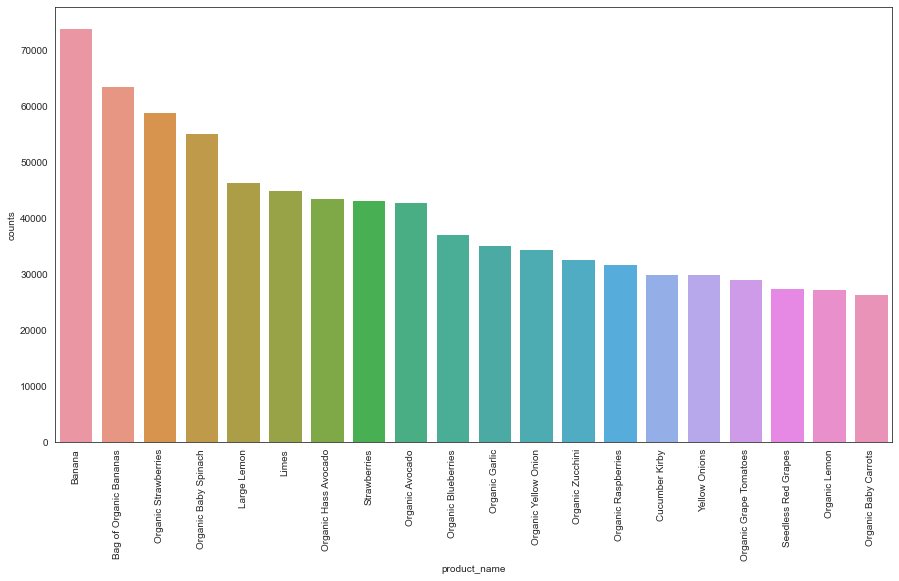

In [47]:
order_prior = order_products__prior.merge(orders, on='order_id')
group_user_product_count = order_prior.groupby(['user_id','product_id']).size().reset_index(name='counts')
most_orderedAgain_food = group_user_product_count.groupby('product_id').size().reset_index(name='counts').sort_values('counts', ascending=False)[:20]
most_orderedAgain_food = most_orderedAgain_food.merge(products, on='product_id', how='inner')

plt.figure(figsize=(15,8))
g = sns.barplot(x='product_name', y='counts', data=most_orderedAgain_food)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

## How many products users generally ordered in single order

[Text(0.5, 0, 'Number of Products in a order'), Text(0, 0.5, 'Frequency')]

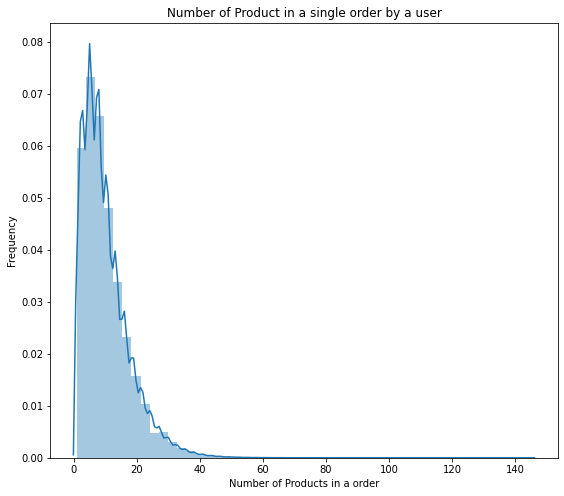

In [125]:
order_ss = order_products__prior.merge(orders, on='order_id')
orderCount = order_ss[['user_id','order_id']].groupby(by=["user_id","order_id"]).size().reset_index(name='counts')
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.title('Number of Product in a single order by a user')
ax= sns.distplot(orderCount['counts'])
ax.set(xlabel='Number of Products in a order', ylabel = 'Frequency')


## Average number of products users generally reordered again

[Text(0.5, 0, 'Average number of Product'), Text(0, 0.5, 'Frequency')]

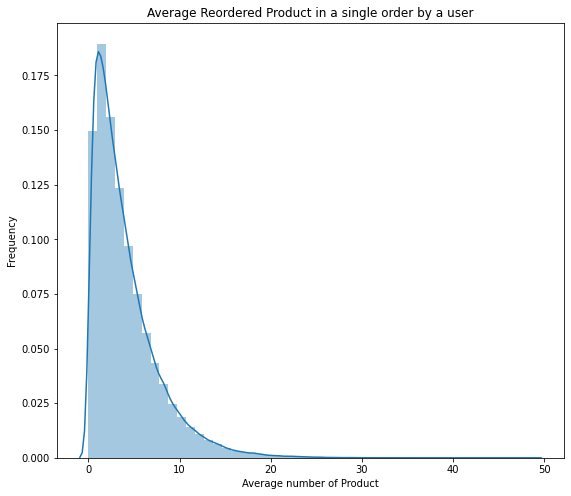

In [124]:
order_ss = order_products__prior.merge(orders, on='order_id')
orderCount = order_ss[['user_id','reordered']].groupby(by=["user_id"]).agg({'reordered':'sum'})
orderCount1 = orders[['user_id','eval_set']].groupby(by=["user_id"]).agg({'eval_set':'count'})
orderCount['average_count']=orderCount['reordered']/orderCount['eval_set']

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.title('Average Reordered Product in a single order by a user')
ax= sns.distplot(orderCount['average_count'])
ax.set(xlabel='Average number of Product', ylabel = 'Frequency')

# Number of Orders from Department/Aisle

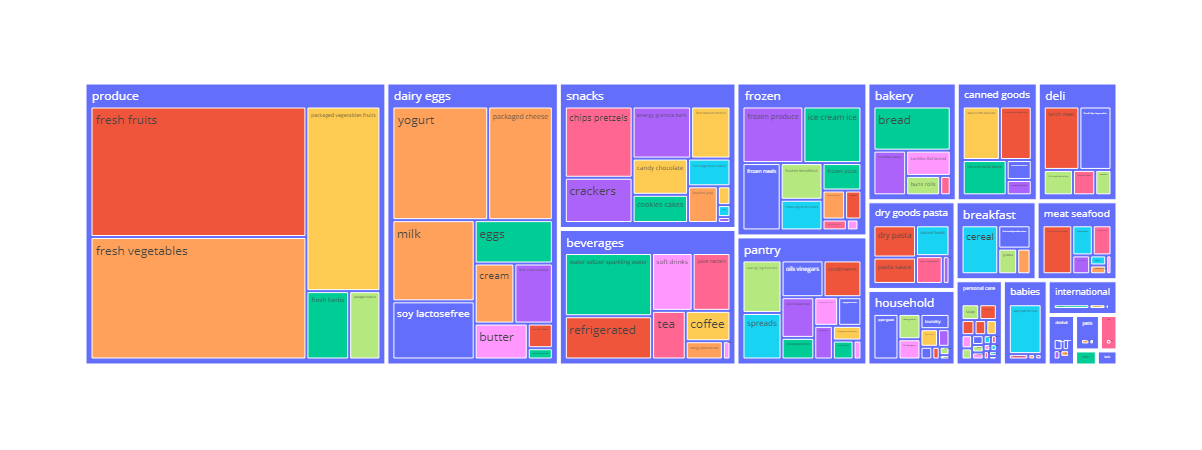

							Size of the box signify the number of orders


In [47]:
import plotly.express as px
import numpy as np

order_product = order_products__prior.merge(products, on='product_id')
aisle_count = order_product.groupby(['aisle_id','department_id']).size().reset_index(name='counts')
aisle_department_count = aisle_count.merge(aisles, on='aisle_id').merge(departments,on='department_id')
    [['aisle','department','counts']]
fig = px.treemap(aisle_department_count, path=['department', 'aisle'], values='counts',
                  color='aisle', hover_data=['department'],
                  color_continuous_scale='RdBu')

fig.show()
fig.write_image("Images/fig1.png")

print('\t\t\t\t\t\t\tSize of the box signify the number of orders')